# Data ETL Pipeline - Interactive Example 📊

This notebook demonstrates a Data ETL Pipeline for loading, cleaning, and analyzing sales data.

**Key steps:**
- Load and validate raw data
- Clean and transform the data
- Generate aggregated reports
- Visualize key insights

## 🚀 Getting Started

To run this notebook, launch Jupyter Lab with the required dependencies:

```bash
uvx --with "flowerpower[rq],pandas>=2.0.0,matplotlib,seaborn" jupyter lab
```

## 📦 Setup & Dependencies

Import necessary libraries and set up the environment.

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Configure plotting
plt.style.use("default")
sns.set_palette("husl")
%matplotlib inline

# Add FlowerPower src to path
#sys.path.insert(0, str(Path.cwd().parents[2] / "src"))

from flowerpower.pipeline.manager import PipelineManager

print("✅ Dependencies loaded and environment set up.")

/home/volker/coding/flowerpower/.worktree/code-simplification-analysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-26 16:16:19,959	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


✅ Dependencies loaded and environment set up.


## 🔧 Initialize FlowerPower Pipeline

Set up the pipeline manager to execute our ETL workflow.

In [2]:
pipeline_manager = PipelineManager(base_dir=".", fs=None)
print(
    f"✅ Pipeline manager initialized. Available pipelines: {pipeline_manager.list_pipelines()}"
)

✅ Pipeline manager initialized. Available pipelines: [{'name': 'sales_etl', 'path': 'pipelines/sales_etl.py', 'mod_time': '2025-09-15 09:52:46', 'size': '7.2 KB'}]


## 📊 Explore Sample Data

Examine the raw sales data before processing.

In [3]:
sales_data = pd.read_csv("data/sales_data.csv")
print(f"Dataset shape: {sales_data.shape}")
print(f"Missing values: {sales_data.isnull().sum().sum()}")
print(f"Duplicate rows: {sales_data.duplicated().sum()}")
sales_data.head()

Dataset shape: (20, 5)
Missing values: 0
Duplicate rows: 0


,date,product,price,quantity,customer
0,2024-01-15,Widget A,25.99,5,John Doe
1,2024-01-15,Widget B,45.50,2,Jane Smith
2,2024-01-16,Widget A,25.99,3,Bob Johnson
3,2024-01-16,Widget C,75.00,1,Alice Brown
4,2024-01-17,Widget B,45.50,4,John Doe


## 🎯 Run ETL Pipeline

Execute the `sales_etl` pipeline to process the data.

In [4]:
result = pipeline_manager.run(
    "sales_etl", final_vars=["clean_data", "sales_summary", "validation_report"]
)

clean_data = result["clean_data"]
sales_summary = result["sales_summary"]
validation_report = result["validation_report"]

print("✅ Pipeline execution completed!")

2025-09-26 16:16:21.523 | INFO     | flowerpower.pipeline.pipeline:_execute_with_retry:223 - 🚀 Running pipeline 'sales_etl' (attempt 1/4)
2025-09-26 16:16:21.526 | INFO     | pipelines.sales_etl:raw_data:26 - Loading data from /home/volker/coding/flowerpower/.worktree/code-simplification-analysis/examples/data-etl-pipeline/data/sales_data.csv
2025-09-26 16:16:21.530 | INFO     | pipelines.sales_etl:raw_data:32 - Loaded 20 records from data/sales_data.csv
2025-09-26 16:16:21.536 | INFO     | pipelines.sales_etl:validation_report:85 - Validation complete. Valid: True
2025-09-26 16:16:21.542 | INFO     | pipelines.sales_etl:clean_data__true:100 - Converted date column to datetime
2025-09-26 16:16:21.545 | INFO     | pipelines.sales_etl:clean_data__true:122 - Calculated total_sales column
2025-09-26 16:16:21.546 | INFO     | pipelines.sales_etl:clean_data__true:124 - Data cleaning complete. Final record count: 20
2025-09-26 16:16:21.554 | INFO     | pipelines.sales_etl:sales_summary:178 - 

✅ Pipeline execution completed!


### 🔍 Validation Report

Check the data validation results.

In [5]:
print(f"Data is valid: {validation_report['is_valid']}")
print(f"Price violations: {validation_report['price_violations']}")
if validation_report["missing_values"]:
    print(f"Missing values: {validation_report['missing_values']}")

Data is valid: True
Price violations: 0


### 🧹 Clean Data

Inspect the cleaned data.

In [6]:
print(f"Clean data shape: {clean_data.shape}")
print(f"Missing values after cleaning: {clean_data.isnull().sum().sum()}")
print(f"Total revenue: ${clean_data['total_sales'].sum():,.2f}")
clean_data.head()

Clean data shape: (20, 6)
Missing values after cleaning: 0
Total revenue: $2,433.22


,date,product,price,quantity,customer,total_sales
0,2024-01-15,Widget A,25.99,5,John Doe,129.95
1,2024-01-15,Widget B,45.50,2,Jane Smith,91.00
2,2024-01-16,Widget A,25.99,3,Bob Johnson,77.97
3,2024-01-16,Widget C,75.00,1,Alice Brown,75.00
4,2024-01-17,Widget B,45.50,4,John Doe,182.00


### 📈 Sales Summary

Review the aggregated sales summary.

In [7]:
print(f"Sales summary shape: {sales_summary.shape}")
sales_summary.head(10)

Sales summary shape: (13, 5)


,product,customer,total_sales,avg_price,total_quantity
7,Widget B,Jane Smith,500.50,45.50,11
10,Widget C,Bob Johnson,300.00,75.00,4
3,Widget A,David Lee,285.89,25.99,11
5,Widget B,Carol White,227.50,45.50,5
12,Widget C,John Doe,225.00,75.00,3
8,Widget B,John Doe,182.00,45.50,4
0,Widget A,Alice Brown,181.93,25.99,7
11,Widget C,Jane Smith,150.00,75.00,2
4,Widget A,John Doe,129.95,25.99,5
1,Widget A,Bob Johnson,77.97,25.99,3


## 📊 Data Visualization

Visualize the processed data to gain insights.

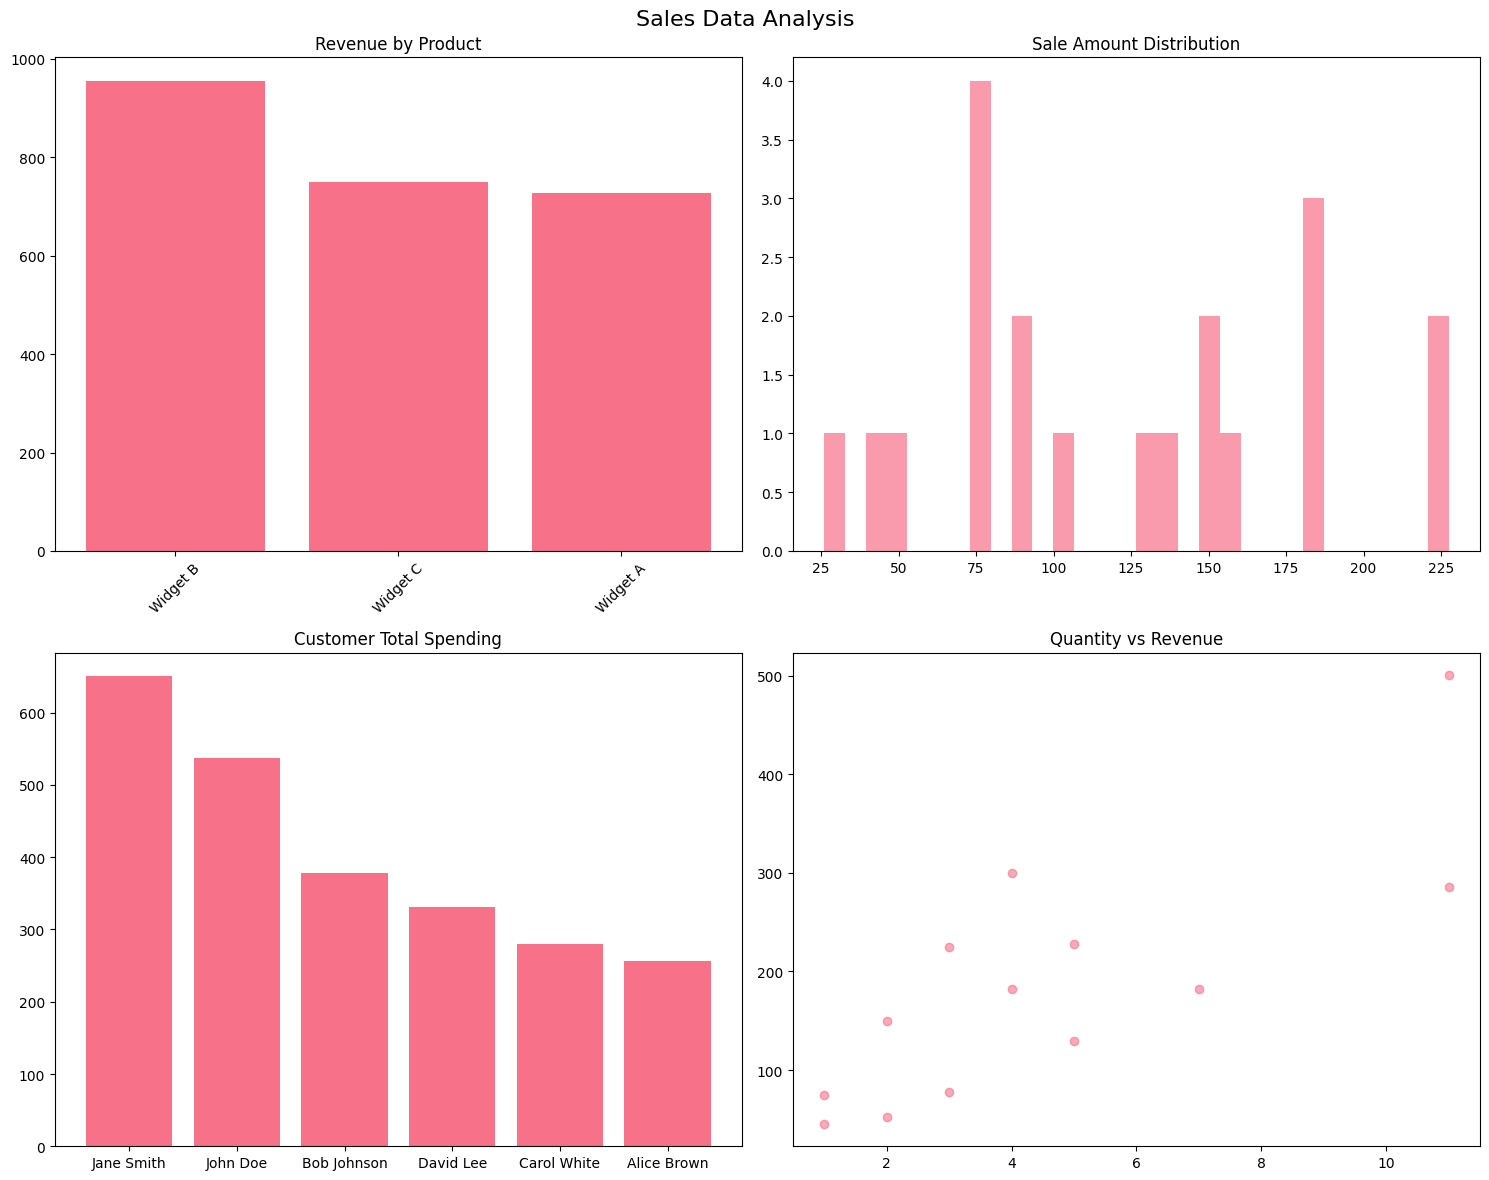

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Sales Data Analysis", fontsize=16)

# Revenue by Product
product_revenue = (
    sales_summary.groupby("product")["total_sales"].sum().sort_values(ascending=False)
)
axes[0, 0].bar(product_revenue.index, product_revenue.values)
axes[0, 0].set_title("Revenue by Product")
axes[0, 0].tick_params(axis="x", rotation=45)

# Sale Amount Distribution
axes[0, 1].hist(clean_data["total_sales"], bins=30, alpha=0.7)
axes[0, 1].set_title("Sale Amount Distribution")

# Customer Spending
customer_spending = (
    sales_summary.groupby("customer")["total_sales"].sum().sort_values(ascending=False)
)
axes[1, 0].bar(customer_spending.index, customer_spending.values)
axes[1, 0].set_title("Customer Total Spending")

# Quantity vs Revenue
axes[1, 1].scatter(
    sales_summary["total_quantity"], sales_summary["total_sales"], alpha=0.6
)
axes[1, 1].set_title("Quantity vs Revenue")

plt.tight_layout()
plt.show()

## ⚙️ Pipeline Configuration Experiments

Test how different configurations affect the output. Here, we'll test a stricter price validation.

In [9]:
strict_result = pipeline_manager.run(
    "sales_etl",
    inputs={"min_price": 5.0, "max_price": 500.0},
    final_vars=["validation_report"],
)
strict_validation = strict_result["validation_report"]

print(f"Original price violations: {validation_report['price_violations']}")
print(f"Strict price violations: {strict_validation['price_violations']}")

2025-09-26 16:16:32.601 | INFO     | flowerpower.pipeline.pipeline:_execute_with_retry:223 - 🚀 Running pipeline 'sales_etl' (attempt 1/4)
2025-09-26 16:16:32.604 | INFO     | pipelines.sales_etl:raw_data:26 - Loading data from /home/volker/coding/flowerpower/.worktree/code-simplification-analysis/examples/data-etl-pipeline/data/sales_data.csv
2025-09-26 16:16:32.606 | INFO     | pipelines.sales_etl:raw_data:32 - Loaded 20 records from data/sales_data.csv
2025-09-26 16:16:32.609 | INFO     | pipelines.sales_etl:validation_report:85 - Validation complete. Valid: True
2025-09-26 16:16:32.610 | SUCCESS  | flowerpower.pipeline.pipeline:_execute_with_retry:232 - ✅ Pipeline 'sales_etl' completed successfully in a moment


Original price violations: 0
Strict price violations: 0


## 💾 Export and Save Results

Save the cleaned data, sales summary, and validation report.

In [10]:
output_dir = Path("notebook_outputs")
output_dir.mkdir(exist_ok=True)

clean_data.to_csv(output_dir / "cleaned_sales_data.csv", index=False)
sales_summary.to_csv(output_dir / "sales_summary.csv", index=False)
with open(output_dir / "validation_report.json", "w") as f:
    json.dump(validation_report, f, indent=2, default=str)

print(f"✅ Outputs saved to: {output_dir.absolute()}")

✅ Outputs saved to: /home/volker/coding/flowerpower/.worktree/code-simplification-analysis/examples/data-etl-pipeline/notebook_outputs


## 🔗 Learn More

To run the script version of this pipeline:

```bash
uv run scripts/run_example.py sync
```